In [40]:
# Import required libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file 
df = pd.read_csv("data/lfw_arnie_nonarnie.csv")

# Seperate the predictor and class label
X = df.drop('Label', axis=1)
y = df['Label'] 

# Split the data into training and testing sets using stratify to balance the class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,Label
0,-2.061987,0.581320,-0.249115,-0.631340,-1.359899,0.751619,-0.029364,1.610456,0.341402,1.286709,0.708114,0.532856,0.120662,-0.233355,-1.044630,0.708812,0.102934,-0.646379,0.079747,0.259006,-0.823252,-0.073053,0.000012,-0.889346,0.102545,0.429773,0.325874,-0.154608,0.249043,0.734776,-0.557264,-0.125949,-0.085757,0.219186,-0.598182,0.686688,-0.454214,-0.349097,0.427917,-0.430217,...,0.192106,-0.200329,-0.084005,0.170044,0.088048,0.046566,-0.138270,-0.082937,-0.152811,0.017811,0.073691,0.018255,0.059794,0.125830,-0.040191,-0.016609,0.101636,0.373098,-0.112695,-0.310741,0.118343,-0.029749,-0.184334,0.106879,-0.102218,0.220604,-0.161994,-0.017457,-0.225212,0.275103,-0.356844,-0.016488,-0.228473,0.258134,0.046834,0.135742,-0.068297,0.022038,0.090003,1
1,-0.796838,-0.667228,-0.107889,0.019755,-0.686348,0.912779,0.463412,-0.238308,-0.294023,0.215470,0.396033,0.590155,0.127292,-0.554574,-0.743637,0.362179,-0.872961,0.076257,1.125764,-0.575236,-0.607877,0.379153,-0.347103,-0.659013,-0.449097,0.341072,0.937572,-0.089466,0.480191,0.111528,-0.158382,1.037095,-0.091880,-0.322881,-0.468454,-0.252643,0.581741,-0.225666,0.511933,0.114880,...,-0.573384,0.047608,0.199231,-0.337638,-0.412542,0.357298,0.007240,-0.096339,0.128999,0.004475,0.350419,-0.271911,0.095161,-0.101089,0.114538,-0.056913,-0.064404,0.146814,0.442595,0.184349,-0.231899,-0.385522,-0.145551,-0.269373,-0.143683,-0.043807,0.094818,0.275936,0.302230,0.233808,-0.037243,-0.012105,-0.351285,-0.034968,0.192314,-0.015406,-0.089117,0.023588,-0.019998,1
2,5.376779,1.142695,2.543111,-2.727212,0.272785,-0.972187,1.111221,1.645502,-2.556968,-0.648781,-0.430632,0.576847,0.761946,-0.661188,-0.804289,-0.332128,-0.632490,-0.440453,-0.427574,0.890283,0.192748,0.066656,-0.197127,-1.128692,-0.472366,0.006519,0.071720,-0.057759,-0.392824,0.487612,0.364861,-0.738375,-0.551977,0.687852,0.006524,0.641928,0.328818,-0.316963,-0.364977,0.350749,...,0.302920,0.150084,-0.160967,-0.144635,-0.013547,-0.185011,-0.005928,0.165310,-0.179431,0.079075,0.206602,0.101385,-0.284894,0.085361,0.006436,0.016880,-0.134763,0.053844,0.044114,0.171145,-0.306689,0.141176,0.183336,-0.025694,0.222032,-0.075223,-0.244048,-0.092831,0.039170,0.143808,0.157441,-0.333875,-0.303720,-0.085975,0.171346,0.128577,-0.118262,0.045881,-0.190158,1
3,7.029235,1.242883,-2.628079,1.224479,-1.141370,-1.620647,0.205890,1.567561,0.736200,0.010782,0.382048,0.457527,1.053649,-0.225129,0.746109,0.951153,2.139957,0.222731,0.352131,-0.369624,-0.428360,0.609554,0.468331,0.674288,0.629100,-0.238961,-0.237057,-0.900939,-0.465342,0.001495,1.744428,0.216003,0.046028,-0.390643,-0.334763,0.462395,-0.059341,0.238659,0.381685,-0.465571,...,-0.251696,0.490606,0.291392,-0.146119,0.078534,-0.441927,-0.193707,-0.244864,0.285215,0.053636,-0.143409,0.096032,0.045515,0.321206,-0.107726,-0.118376,-0.113556,-0.162301,0.193297,-0.021270,-0.056994,0.259568,0.428184,-0.351284,-0.075552,0.223227,0.125803,-0.374172,-0.023798,0.213687,0.051040,-0.068796,0.141841,-0.227999,0.046044,0.013643,-0.125893,0.146396,0.013320,1
4,5.484822,6.752706,-4.291114,1.740412,-1.603087,-1.075175,1.919936,-0.197615,1.030596,1.451936,-0.418098,0.319124,1.584174,0.728954,-0.913203,-1.363856,0.079728,-1.085581,-1.534230,0.948659,-0.119705,-0.313430,-0.243191,0.593084,0.032255,-0.082904,0.369117,0.423439,0.845681,0.216275,0.516234,-0.566205,0.459498,0.223092,-0.564321,1.080568,0.822447,0.139215,-1.596073,-0.131355,...,-0.065716,-0.291799,0.196658,0.045446,-0.320277,-0.168644,0.040963,0.159333,-0.011565,-0.253465,-0.223389,-0.080398,-0.208127,-0.107232,0.020327,0.078007,0.120614,0.526614,0.081479,0.210342,-0.083386,-0.101139,0.261650,0.115369,-0.247231,0.182866,0.174559,0.269726,-0.213112,-0.028310,0.034412,0.265141,0.226000,0

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
models = {
    'lr': LogisticRegression(),
    'knc': KNeighborsClassifier(),
    'dtc': DecisionTreeClassifier()
}

In [44]:
param_grid = {
    "lr" : {
        "lr__C" : [0.01, 0.1, 1, 10]
    },
    "knc" : {
        "knc__n_neighbors" : range(1,10)
    },
    "dtc" : {
        "dtc__max_depth" : [2,3,10],
        "dtc__min_samples_split" : [2, 5, 10, 20],
        "dtc__random_state" : [42]
    }
}

In [45]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [46]:
accuracies = {}
params = {}
pipelines = {}

In [47]:
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grid[name], cv=kf, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    accuracies[name] = grid_search.best_score_
    params[name] = grid_search.best_params_
    pipelines[name] = grid_search

In [48]:
best_model_name = max(accuracies, key=accuracies.get)
best_model_info = params[best_model_name]
best_model_cv_score = max(accuracies.values())

In [49]:
y_pred = pipelines[best_model_name].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)

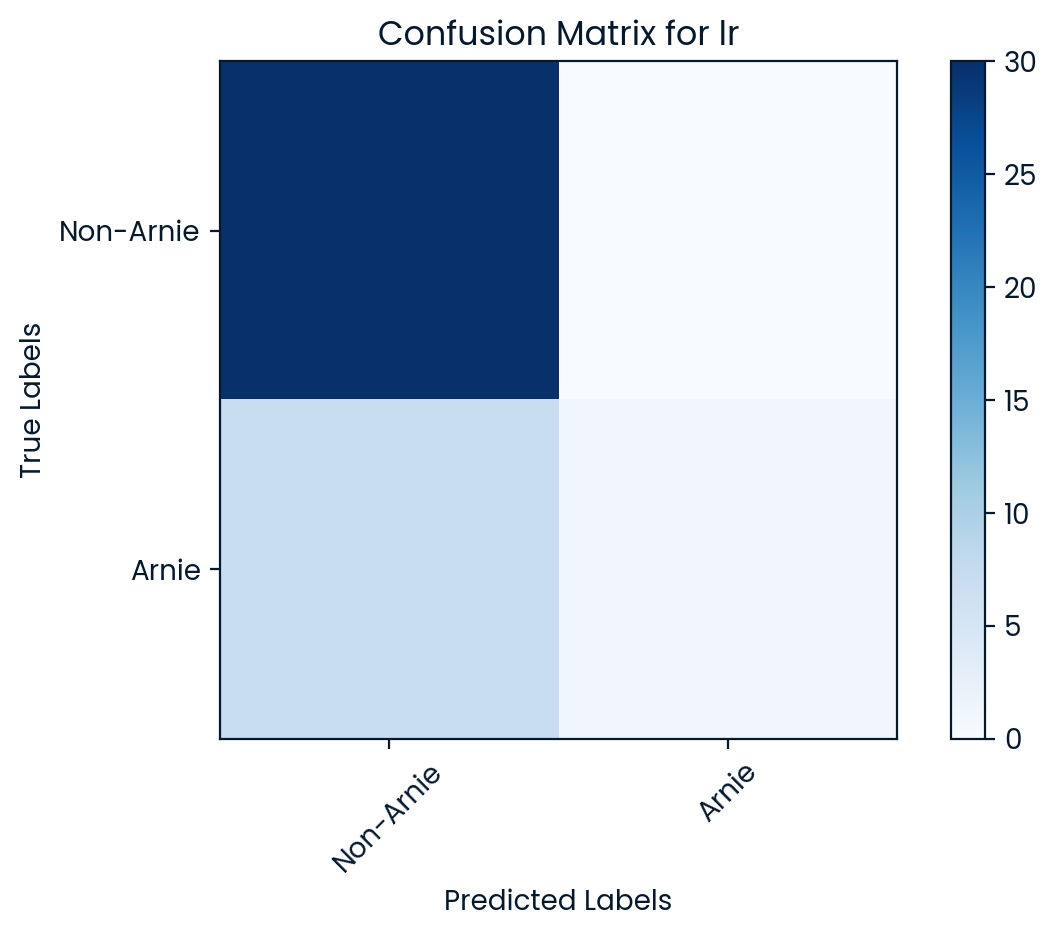

In [51]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, ['Non-Arnie', 'Arnie'], rotation=45)
plt.yticks(tick_marks, ['Non-Arnie', 'Arnie'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()